In [1]:
from simlp import Value, Layer, Neuron, MLP
import random
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


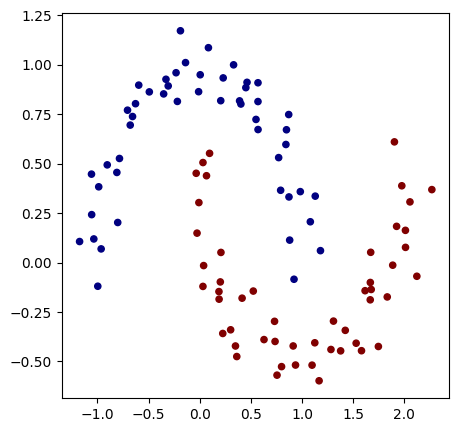

In [2]:
from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

y = y*2 - 1
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=20)


In [3]:
model = MLP(2, [16, 16, 1])
print(model)
print("number of parameters", len(model.parameters()))

MLP of [Layer of [Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2)], Layer of [Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16)], Layer of [Neuron(16)]]
number of parameters 337


In [14]:
math.sqrt(4)

2.0

In [4]:
def loss(batch_size=None):

    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    
    # forward the model to get scores
    scores = list(map(model, inputs))
    
    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).tanh() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)
 

Value(0.6899644310752133) 0.62


In [5]:
# optimization
for k in range(100):
    
    # forward
    total_loss, acc = loss()
    
    # backward
    model.zero_grad()
    total_loss.backward()
    
    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")

step 0 loss 0.6899644310752133, accuracy 62.0%
step 1 loss 0.33835098208382375, accuracy 73.0%
step 2 loss 0.2793693968265081, accuracy 81.0%
step 3 loss 0.22982233198302982, accuracy 84.0%
step 4 loss 0.20546289221492534, accuracy 84.0%
step 5 loss 0.19051252465584742, accuracy 85.0%
step 6 loss 0.1804471038906236, accuracy 87.0%
step 7 loss 0.17341238918552784, accuracy 87.0%
step 8 loss 0.16837678170666312, accuracy 87.0%
step 9 loss 0.1648723481754276, accuracy 87.0%
step 10 loss 0.16242133508907236, accuracy 87.0%
step 11 loss 0.16061583809625293, accuracy 87.0%
step 12 loss 0.15921577015661828, accuracy 87.0%
step 13 loss 0.15808492728817233, accuracy 87.0%
step 14 loss 0.1571424778674594, accuracy 87.0%
step 15 loss 0.15633803369144997, accuracy 87.0%
step 16 loss 0.15563865238479693, accuracy 87.0%
step 17 loss 0.15502178587944293, accuracy 87.0%
step 18 loss 0.1544713060855161, accuracy 87.0%
step 19 loss 0.15397518734026355, accuracy 87.0%
step 20 loss 0.15352411082399747, ac

(-1.5978882018302847, 2.1521117981697153)

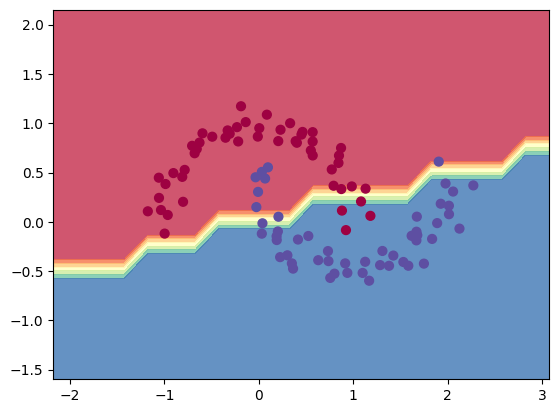

In [6]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

